In [18]:
import os
print (os.listdir('sample_data'))
print (os.listdir())

['anscombe.json', 'california_housing_train.csv', 'mnist_train_small.csv', 'mnist_test.csv', 'README.md', 'california_housing_test.csv']
['.config', 'sample_data', 'international-airline-passengers.csv']


In [0]:
import pandas as pd
data = pd.read_csv('international-airline-passengers.csv')

In [0]:
import matplotlib.pyplot as plt
import numpy as np

data = data.iloc[:-1,1]
data = data.values
data = data.astype('float32')

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(1)
data = np.reshape(data[:], (len(data),1))
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
data = scaler.fit_transform(data)

In [24]:
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[:train_size,:], data[train_size:,:]
print (len(train), len(test))

96 48


In [0]:
def create_data(data, look_back=5):
        cdata = []
        for index in range(data.shape[0] - look_back):
                cdata.append(data[index:index+look_back])
        cdata = np.array(cdata)
        x_train = cdata[:,:-1,:]
        y_train = cdata[:,-1,:]
        return (x_train, y_train)

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                dataX.append(a)
                dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

In [0]:
x_train, y_train = create_data(train)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [27]:
model = Sequential()
model.add(LSTM(4, input_shape=(4,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=500, batch_size=1, verbose=2)


Epoch 1/500
 - 1s - loss: 0.0093
Epoch 2/500
 - 0s - loss: 0.0051
Epoch 3/500
 - 0s - loss: 0.0045
Epoch 4/500
 - 0s - loss: 0.0042
Epoch 5/500
 - 0s - loss: 0.0040
Epoch 6/500
 - 0s - loss: 0.0038
Epoch 7/500
 - 0s - loss: 0.0036
Epoch 8/500
 - 0s - loss: 0.0037
Epoch 9/500
 - 0s - loss: 0.0035
Epoch 10/500
 - 0s - loss: 0.0038
Epoch 11/500
 - 0s - loss: 0.0036
Epoch 12/500
 - 0s - loss: 0.0035
Epoch 13/500
 - 0s - loss: 0.0036
Epoch 14/500
 - 0s - loss: 0.0036
Epoch 15/500
 - 0s - loss: 0.0035
Epoch 16/500
 - 0s - loss: 0.0035
Epoch 17/500
 - 0s - loss: 0.0034
Epoch 18/500
 - 0s - loss: 0.0034
Epoch 19/500
 - 0s - loss: 0.0036
Epoch 20/500
 - 0s - loss: 0.0036
Epoch 21/500
 - 0s - loss: 0.0035
Epoch 22/500
 - 0s - loss: 0.0034
Epoch 23/500
 - 0s - loss: 0.0033
Epoch 24/500
 - 0s - loss: 0.0033
Epoch 25/500
 - 0s - loss: 0.0035
Epoch 26/500
 - 0s - loss: 0.0033
Epoch 27/500
 - 0s - loss: 0.0033
Epoch 28/500
 - 0s - loss: 0.0033
Epoch 29/500
 - 0s - loss: 0.0033
Epoch 30/500
 - 0s - lo

In [0]:
x_test, y_test = create_data(test)

In [32]:
model.evaluate(x_test, y_test)

43/43 [==============================] - 0s 112us/step


0.023697049465290335

In [0]:
predict = model.predict(x_test)

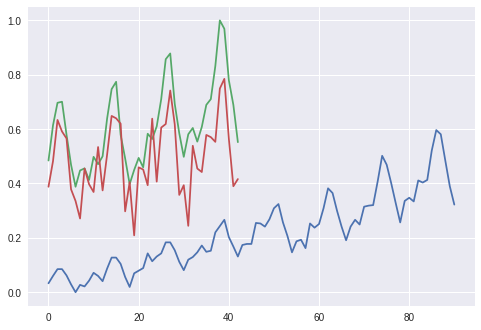

In [34]:
plt.plot(y_train)
plt.plot(y_test)
plt.plot(predict)